In [2]:
import pandas as pd

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_reviews_merged = pd.read_csv('/content/drive/MyDrive/waw_reviews.csv')

In [9]:
df_reviews_merged = pd.read_csv('C:/Users/helme/Documents/Thesis/waw_reviews.csv')

In [19]:
# Save review  datasets
df_waw_reviews=pd.read_csv("C:/Users/helme/Documents/Thesis/waw_reviews.csv")

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import re
from collections import Counter
import matplotlib.dates as mdates

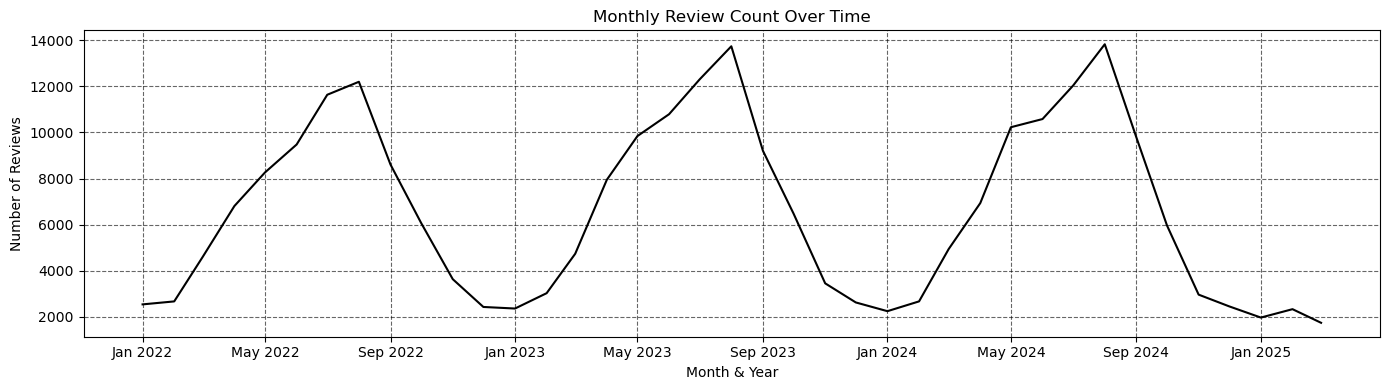

In [11]:
# Convert the date column to datetime
df_reviews_merged['date'] = pd.to_datetime(df_reviews_merged['date'])

# Extract year-month for grouping
df_reviews_merged['year_month'] = df_reviews_merged['date'].dt.to_period('M')

# Count reviews per month
monthly_reviews = df_reviews_merged.groupby('year_month').size().reset_index(name='review_count')

# Convert period back to timestamp for plotting
monthly_reviews['year_month'] = monthly_reviews['year_month'].dt.to_timestamp()

plt.figure(figsize=(14,4))
sns.lineplot(data=monthly_reviews, x='year_month', y='review_count',color = 'black')

# Set x-axis format to show abbreviated month and year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.title("Monthly Review Count Over Time")
plt.xlabel("Month & Year")
plt.ylabel("Number of Reviews")
plt.grid(True, linestyle="--", alpha=0.6, color = 'black')
plt.tight_layout()
plt.savefig("reviews_per_month.png", dpi=300)
plt.show()

In [15]:
print("\n--- Basic Info ---")
print(df_reviews_merged.info())


--- Basic Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256074 entries, 0 to 256073
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   listing_id     256074 non-null  int64         
 1   id             256074 non-null  int64         
 2   date           256074 non-null  datetime64[ns]
 3   reviewer_id    256074 non-null  int64         
 4   reviewer_name  256074 non-null  object        
 5   comments       256051 non-null  object        
 6   year_month     256074 non-null  period[M]     
dtypes: datetime64[ns](1), int64(3), object(2), period[M](1)
memory usage: 13.7+ MB
None


In [16]:
print("\n--- Summary Statistics ---")
print(df_reviews_merged.describe(include='all'))


--- Summary Statistics ---
          listing_id            id                           date  \
count   2.560740e+05  2.560740e+05                         256074   
unique           NaN           NaN                            NaN   
top              NaN           NaN                            NaN   
freq             NaN           NaN                            NaN   
mean    2.896754e+07  9.472266e+17  2023-07-30 07:57:30.868108544   
min     4.017600e+04  5.301406e+17            2022-01-01 00:00:00   
25%     1.760636e+07  7.200749e+17            2022-09-20 00:00:00   
50%     2.695476e+07  9.448614e+17            2023-07-27 00:00:00   
75%     4.365422e+07  1.168074e+18            2024-05-30 00:00:00   
max     5.440879e+07  1.380468e+18            2025-03-19 00:00:00   
std     1.526591e+07  2.277797e+17                            NaN   

         reviewer_id reviewer_name comments year_month  
count   2.560740e+05        256074   256051     256074  
unique           NaN         

In [17]:
# Missing Values
print("\n--- Missing Values ---")
print(df_reviews_merged.isnull().sum())


--- Missing Values ---
listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         23
year_month        0
dtype: int64


In [18]:
# Check duplicates
print("\n--- Duplicate Rows ---")
print(df_reviews_merged.duplicated().sum())


--- Duplicate Rows ---
0


In [11]:
# Convert 'date' column to datetime if not already
df_reviews_merged['date'] = pd.to_datetime(df_waw_reviews['date'])

# Earliest and latest reviews
print("\n--- Date Range ---")
print("Earliest review:", df_waw_reviews['date'].min())
print("Latest review:", df_waw_reviews['date'].max())


--- Date Range ---
Earliest review: 2022-01-01 00:00:00
Latest review: 2025-03-19 00:00:00


In [12]:
# Number of reviews per year
df_waw_reviews['year'] = df_waw_reviews['date'].dt.year
reviews_per_year = df_waw_reviews.groupby('year').size()
print("\n--- Reviews per Year ---")
print(reviews_per_year)


--- Reviews per Year ---
year
2022    81544
2023    89431
2024    87219
2025     6182
dtype: int64



--- Top 10 Listings by Number of Reviews ---
listing_id
41688023    547
27008758    502
49055359    470
32152392    468
39385777    467
50420315    463
36719718    453
47098625    450
34402031    441
23681213    427
Name: count, dtype: int64


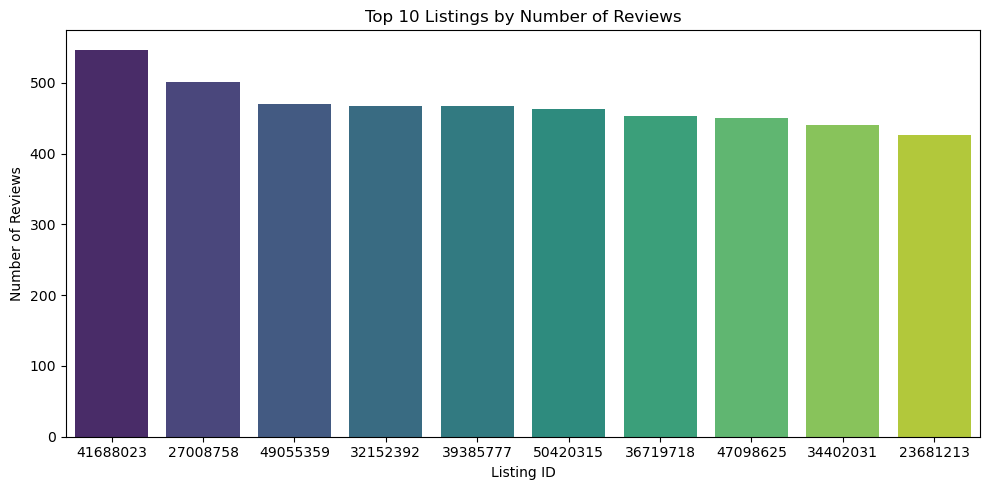

In [24]:
# Top 10 listings with most reviews
top_listings = df_waw_reviews['listing_id'].value_counts().head(10)
print("\n--- Top 10 Listings by Number of Reviews ---")
print(top_listings)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_listings.index.astype(str), hue =top_listings.index.astype(str),  y=top_listings.values, palette="viridis",legend=False)
plt.title("Top 10 Listings by Number of Reviews")
plt.xlabel("Listing ID")
plt.ylabel("Number of Reviews")
plt.tight_layout()
plt.show()

In [14]:
# Top reviewers by number of reviews
top_reviewers = df_waw_reviews['reviewer_id'].value_counts().head(10)
print("\n--- Top 10 Reviewers ---")
print(top_reviewers)


--- Top 10 Reviewers ---
reviewer_id
475611560    61
339978942    33
155899852    26
374145697    24
369827139    22
499038743    18
307108538    17
256673440    16
24510725     15
456298224    14
Name: count, dtype: int64


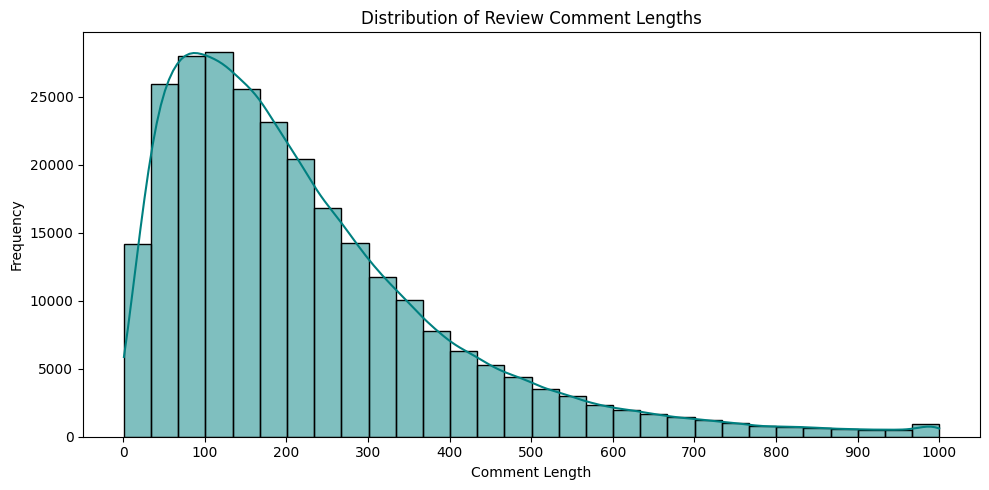

In [15]:
# Review comment length analysis
df_waw_reviews['comment_length'] = df_waw_reviews['comments'].astype(str).apply(len)
plt.figure(figsize=(10, 5))
sns.histplot(df_waw_reviews[df_waw_reviews['comment_length'] <= 1000]['comment_length'], bins=30, kde = True,  color='teal')
plt.title("Distribution of Review Comment Lengths")
plt.xlabel("Comment Length")
plt.ylabel("Frequency")
plt.xticks(range(0, 1001, 100))
plt.tight_layout()
plt.show()

In [16]:
review_counts = df_waw_reviews['listing_id'].value_counts().reset_index()
review_counts.columns = ['listing_id', 'review_count']

# Reviewer Behavior: One-Time vs Repeat Reviewers


One-time reviewers: 183847
Repeat reviewers: 34833


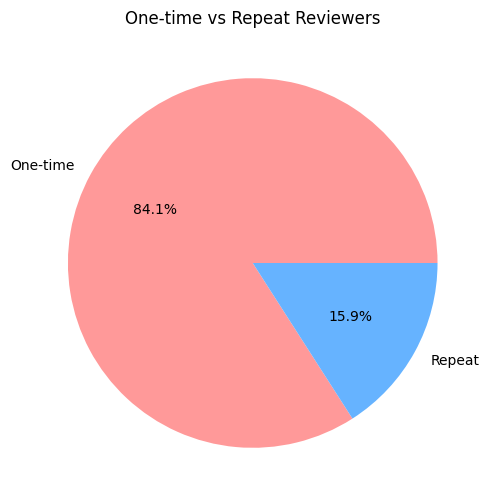

In [17]:
review_counts = df_waw_reviews['reviewer_id'].value_counts()
one_time_reviewers = (review_counts == 1).sum()
repeat_reviewers = (review_counts > 1).sum()

print(f"\nOne-time reviewers: {one_time_reviewers}")
print(f"Repeat reviewers: {repeat_reviewers}")

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie([one_time_reviewers, repeat_reviewers], labels=['One-time', 'Repeat'], autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
plt.title("One-time vs Repeat Reviewers")
plt.show()

# Text Analysis: Most Common Words (Basic)

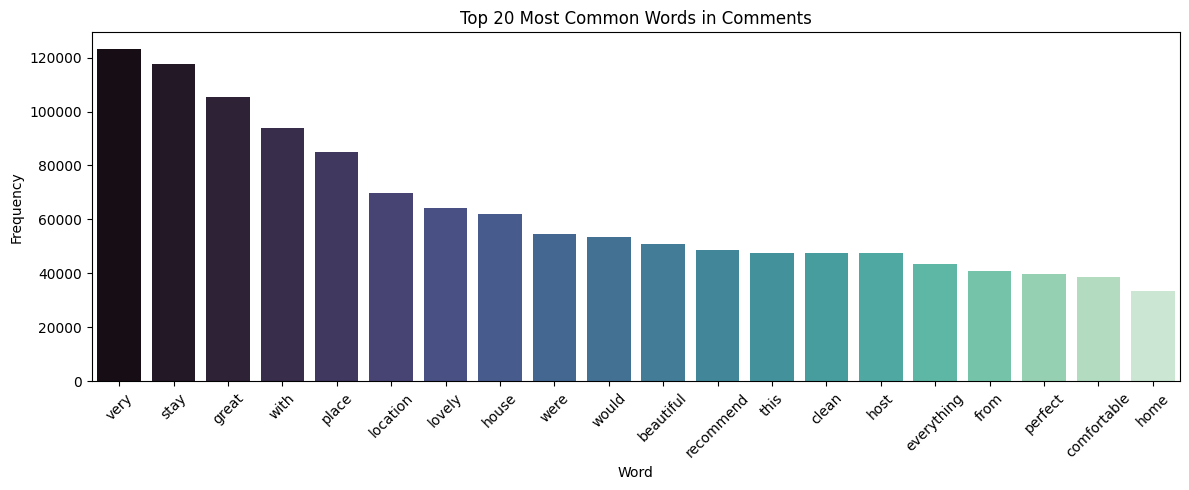

In [18]:
from collections import Counter
all_comments = ' '.join(df_waw_reviews['comments'].dropna().astype(str))

words = re.findall(r'\b\w{4,}\b', all_comments.lower())
common_words = Counter(words).most_common(20)

# Barplot of most common words
common_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])

plt.figure(figsize=(12, 5))
sns.barplot(data=common_df, x='Word', y='Frequency', hue='Word', palette='mako',legend=False)
plt.title("Top 20 Most Common Words in Comments")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Text Length Insights by Listing

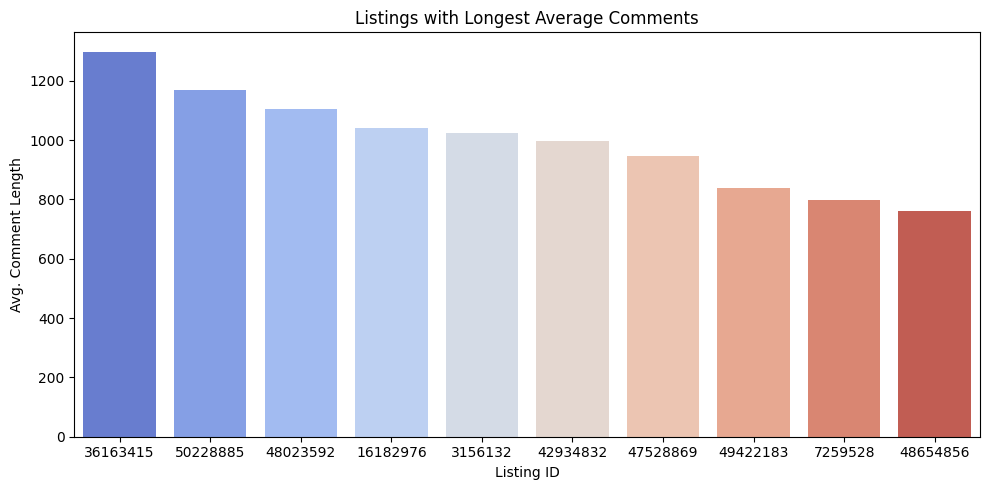

In [19]:
listing_avg_length = df_waw_reviews.groupby('listing_id')['comment_length'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=listing_avg_length.index.astype(str), hue=listing_avg_length.index.astype(str), y=listing_avg_length.values, palette='coolwarm', legend=False)
plt.title("Listings with Longest Average Comments")
plt.xlabel("Listing ID")
plt.ylabel("Avg. Comment Length")
plt.tight_layout()
plt.show()

In [20]:
# Check for empty or very short comments
short_comments = df_waw_reviews[df_waw_reviews['comment_length'] < 20]
print(f"\nShort comments (< 20 chars): {len(short_comments)}")

# Check for null reviewer names
print("\nMissing reviewer names:", df_waw_reviews['reviewer_name'].isnull().sum())


Short comments (< 20 chars): 6054

Missing reviewer names: 0


In [21]:
from wordcloud import WordCloud

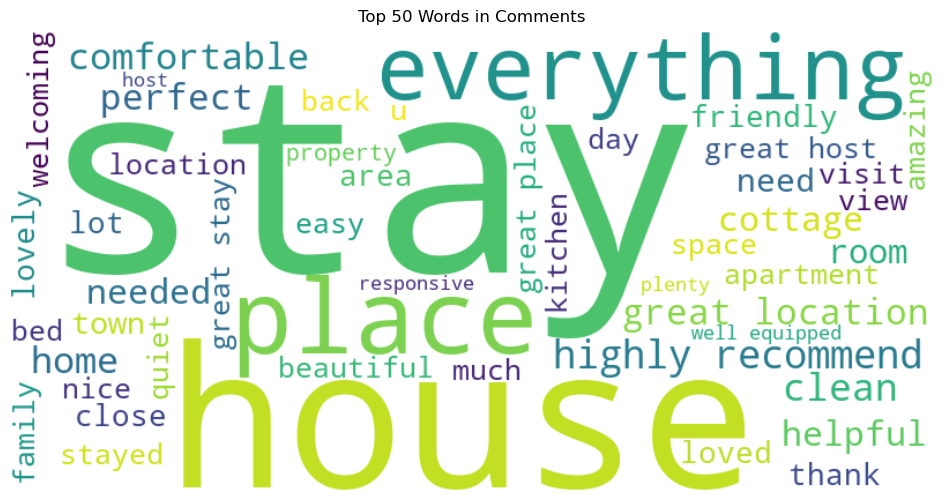

In [23]:
# Word Cloud of review comments
comments = df_waw_reviews['comments'].dropna().astype(str)
all_text = ' '.join(comments).lower()
cleaned_text = re.sub(r'[^\w\s]', '', all_text)

wordcloud = WordCloud(width=800, height=400, max_words = 50, background_color='white').generate(cleaned_text)
plt.figure(figsize=(14, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Top 50 Words in Comments")
plt.show()


Top 10 Most Reviewed Listings:
 listing_id
41688023    547
27008758    502
49055359    470
32152392    468
39385777    467
50420315    463
36719718    453
47098625    450
34402031    441
23681213    427
Name: count, dtype: int64


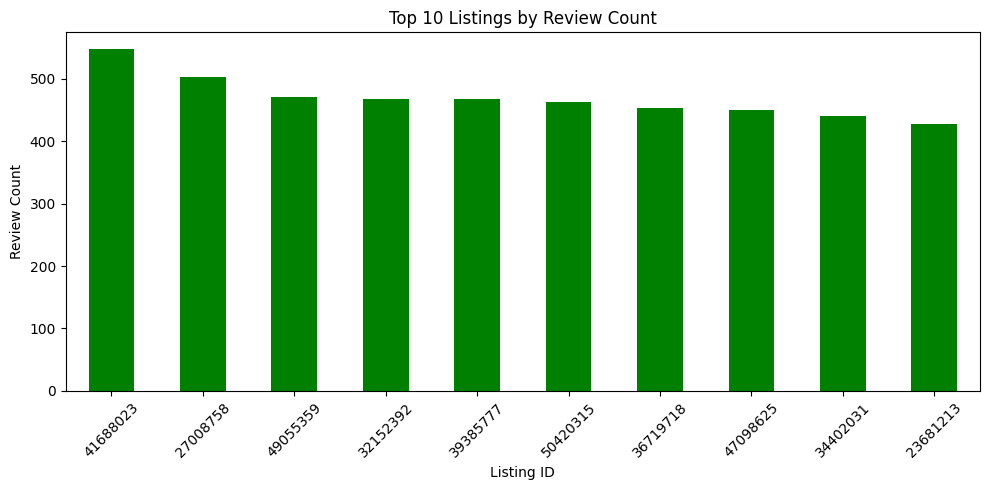

In [23]:
# Top reviewed listings
top_listings = df_waw_reviews['listing_id'].value_counts().head(10)
print("\nTop 10 Most Reviewed Listings:\n", top_listings)

plt.figure(figsize=(10, 5))
top_listings.plot(kind='bar', color='green')
plt.title('Top 10 Listings by Review Count')
plt.xlabel('Listing ID')
plt.ylabel('Review Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [24]:
#Convert to string & strip whitespace
df_waw_reviews['comments'] = df_waw_reviews['comments'].astype(str).str.strip()

In [25]:
#Remove empty or meaningless reviews
df_waw_reviews = df_waw_reviews[df_waw_reviews['comments'].str.len() > 3]

In [26]:
import re

In [27]:
#Remove URLs, HTML, or emojis

def clean_review(comment):
    comment = re.sub(r"http\S+|www\S+", "", comment)        # Remove URLs
    comment = re.sub(r"<.*?>", "", comment)                 # Remove HTML tags
    comment = re.sub(r"[\U00010000-\U0010ffff]", "", comment)  # Remove emojis
    return comment

df_waw_reviews['comments'] = df_waw_reviews['comments'].apply(clean_review)

In [28]:
#For RoBERTa's Twitter-specific model:
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 15.5 MB/s eta 0:00:00


In [29]:
from textblob import TextBlob
from transformers import pipeline
import emoji

                                            comments  sentiment  \
0  Great location,  great house, great break away...   0.600000   
1  Adare is a fabulous location for a break of an...   0.488095   
2  Michelle has a fabulous house in Ireland locat...   0.478571   
3  Our family adored this home!  It is stunning a...   0.570000   
4  This was one of the best value Airbnbs I have ...   0.458333   

  sentiment_category  
0           Positive  
1           Positive  
2           Positive  
3           Positive  
4           Positive  


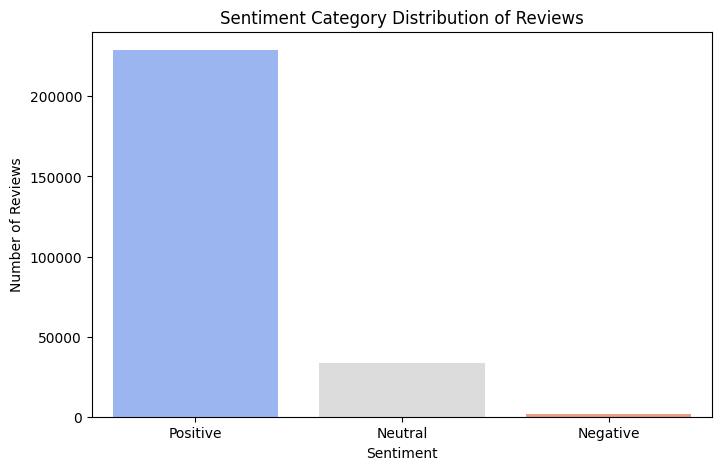

In [30]:
# Apply TextBlob sentiment polarity
df_waw_reviews['sentiment'] = df_waw_reviews['comments'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Categorize sentiment
def get_sentiment_category(p):
    if p > 0.1:
        return 'Positive'
    elif p < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

df_waw_reviews['sentiment_category'] = df_waw_reviews['sentiment'].apply(get_sentiment_category)

# View distribution
print(df_waw_reviews[['comments', 'sentiment', 'sentiment_category']].head())

# Plot sentiment distribution
plt.figure(figsize=(8,5))
sns.countplot(x='sentiment_category', data=df_waw_reviews, palette='coolwarm', hue = 'sentiment_category', legend=False )
plt.title("Sentiment Category Distribution of Reviews")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.show()

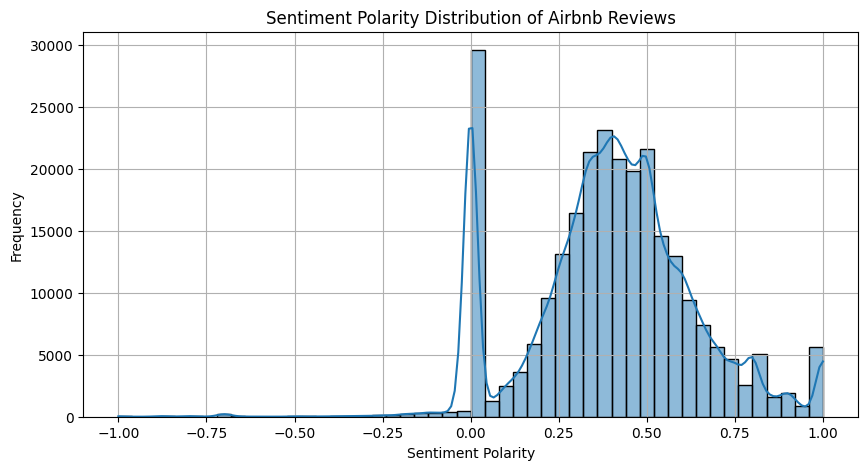

In [31]:
# Example distribution plot
plt.figure(figsize=(10, 5))
sns.histplot(df_waw_reviews['sentiment'], bins=50, kde=True)
plt.title('Sentiment Polarity Distribution of Airbnb Reviews')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [32]:
from transformers import pipeline
import torch
from tqdm import tqdm

In [33]:
# Ensure GPU
device = 0 if torch.cuda.is_available() else -1
print("Using device:", device)

Using device: 0


In [34]:
# Load models 
bert_model = pipeline("sentiment-analysis",
                      model="nlptown/bert-base-multilingual-uncased-sentiment",
                      device=device)

roberta_model = pipeline("sentiment-analysis",
                         model="cardiffnlp/twitter-roberta-base-sentiment",
                         device=device)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/669M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cuda:0


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

Device set to use cuda:0


In [35]:
def batch_sentiment(texts, model, roberta=False):
    results = model(texts, truncation=True, max_length=128)
    scores = []
    probs = []
    for res in results:
        if roberta:
            label = res['label'].upper()
            if label == "LABEL_2":
                scores.append(5)
            elif label == "LABEL_1":
                scores.append(3)
            elif label == "LABEL_0":
                scores.append(1)
            else:
                scores.append(0)
        else:
            # For BERT (labels like "1 star", "2 stars", etc.)
            scores.append(int(res['label'].split()[0]))

        probs.append(res['score'])   # confidence probability (0–1)
    return scores, probs



batch_size = 256
df_waw_reviews['bert_score'] = None
df_waw_reviews['bert_prob'] = None
df_waw_reviews['roberta_score'] = None
df_waw_reviews['roberta_prob'] = None

for start in tqdm(range(0, len(df_waw_reviews), batch_size)):
    batch_texts = df_waw_reviews['comments'].iloc[start:start+batch_size].fillna("").astype(str).tolist()

    bert_scores, bert_probs = batch_sentiment(batch_texts, bert_model)
    roberta_scores, roberta_probs = batch_sentiment(batch_texts, roberta_model, roberta=True)

    batch_index = df_waw_reviews.iloc[start:start+batch_size].index

    df_waw_reviews.loc[batch_index, 'bert_score'] = bert_scores
    df_waw_reviews.loc[batch_index, 'bert_prob'] = bert_probs
    df_waw_reviews.loc[batch_index, 'roberta_score'] = roberta_scores
    df_waw_reviews.loc[batch_index, 'roberta_prob'] = roberta_probs

100%|██████████| 1031/1031 [1:17:30<00:00,  4.51s/it]


In [54]:
#Average score per listing
avg_sentiment = df_waw_reviews.groupby('listing_id').agg({
    'bert_score': 'mean',
    'roberta_score': 'mean'
}).reset_index()

In [55]:
avg_sentiment

,listing_id,bert_score,roberta_score
0,40176,4.707143,4.614286
1,46062,5.0,5.0
2,152256,4.821429,4.5
3,188413,4.858696,4.326087
4,200957,4.821429,4.714286
...,...,...,...
4222,54376022,5.0,4.636364
4223,54382477,4.731092,4.882353
4224,54404933,4.878788,4.924242
4225,54408786,4.736842,4.394737


In [58]:
avg_sentiment['bert_score'] = avg_sentiment['bert_score'].round(2)
avg_sentiment['roberta_score'] = avg_sentiment['roberta_score'].round(2)

In [59]:
print(avg_sentiment.shape)
print(avg_sentiment.head())

(4227, 3)
   listing_id bert_score roberta_score
0       40176   4.707143      4.614286
1       46062        5.0           5.0
2      152256   4.821429           4.5
3      188413   4.858696      4.326087
4      200957   4.821429      4.714286


In [44]:
# Round it for geting cleaner values
df_waw_reviews['bert_score'] = df_waw_reviews['bert_score'].round(2)
df_waw_reviews['roberta_score'] = df_waw_reviews['roberta_score'].round(2)

In [46]:
df_waw_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263738 entries, 0 to 263737
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   listing_id          263738 non-null  int64         
 1   id                  263738 non-null  int64         
 2   date                263738 non-null  datetime64[ns]
 3   reviewer_id         263738 non-null  int64         
 4   reviewer_name       263738 non-null  object        
 5   comments            263738 non-null  object        
 6   year                263738 non-null  int32         
 7   comment_length      263738 non-null  int64         
 8   sentiment           263738 non-null  float64       
 9   sentiment_category  263738 non-null  object        
 10  bert_score          263738 non-null  object        
 11  bert_prob           263738 non-null  object        
 12  roberta_score       263738 non-null  object        
 13  roberta_prob        263738 no

In [49]:
# --- Save Final Dataset ---

# Save to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [61]:
# Download to PC
from google.colab import files
avg_sentiment.to_csv("reviews_and_avg_score.csv", index=False)
files.download("reviews_and_avg_score.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [62]:
#merging average back to dataset
df_waw_reviews = df_waw_reviews.merge(
    avg_sentiment,
    on='listing_id',
    how='left',
    suffixes=('', '_avg')
)